# Immigration data analysis
  - rename columns
  - drop columns
  - add columns

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('Canada.xlsx', sheet_name = 1, skiprows= 20, skipfooter=2)
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [4]:
# rename columns
cols_to_rename = {
    'OdName' : 'Country',
    'AreaName': 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status'
}
df = df.rename(columns=cols_to_rename)
df.head(2)

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,Status,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [5]:
# drop columns
#check no of unique value is data
print('type unique values:', df.Type.nunique())
print('coverage unique values:', df.Coverage.nunique())

#count unique values in a column
print('Coverage unique values count:', df.Coverage.value_counts())

type unique values: 1
coverage unique values: 2
Coverage unique values count: Coverage
Foreigners    194
Citizens        1
Name: count, dtype: int64


In [6]:
cols_to_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df= df.drop(columns=cols_to_drop)
df.head()

,Country,Continent,Region,Status,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### not for every data you use set_index()

In [7]:
df =df.set_index('Country')
df.head()

,Continent,Region,Status,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [8]:
# make all columns lowercase (optional)
df.columns = [str(name).lower() for name in df.columns.tolist()]
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [9]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [10]:
df[years].sum(axis=1) #axis 0 for row wise , 1 for column 

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [11]:
df['total'] = df[years].sum(axis = 1)
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<Axes: >

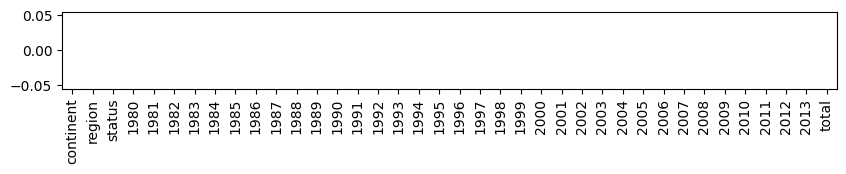

In [12]:
df.isnull().sum().plot(figsize = (10, 1), kind = 'bar')

### `no null values detected`

### `total immigration visualisation`

<Axes: title={'center': 'Total immigration'}, xlabel='Country'>

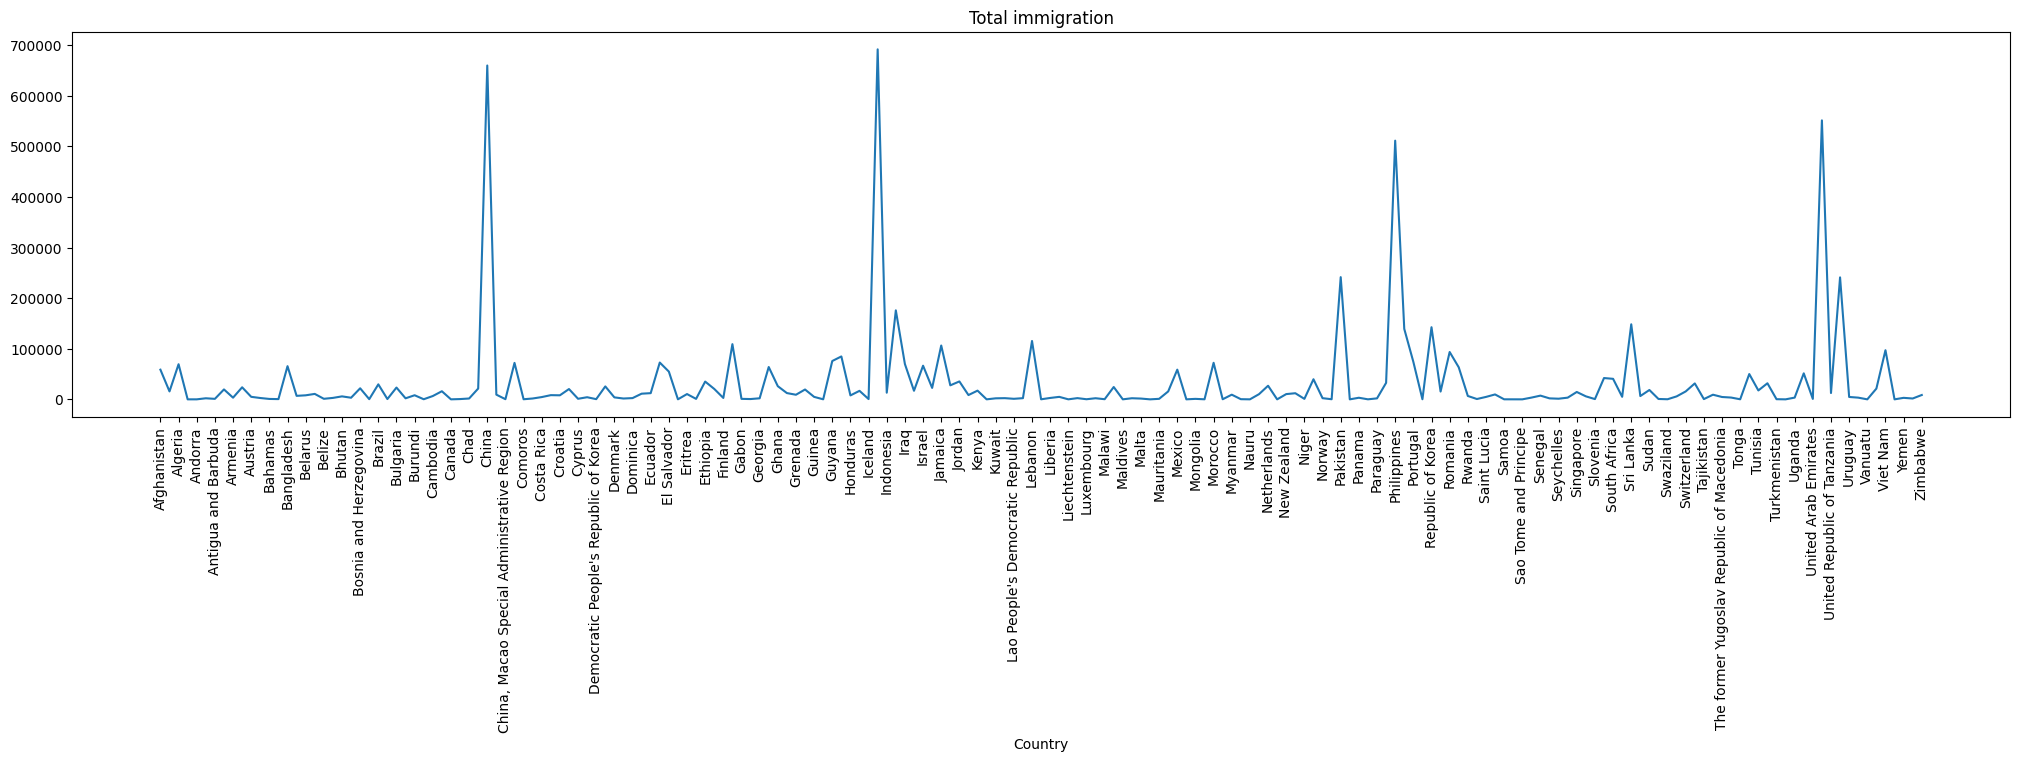

In [13]:
df.total.plot(rot = 90, 
              figsize = (25, 5),
              xticks = range(0, df.shape[0], 2),
              title = 'Total immigration'
              )

Text(0, 0.5, 'Immigration')

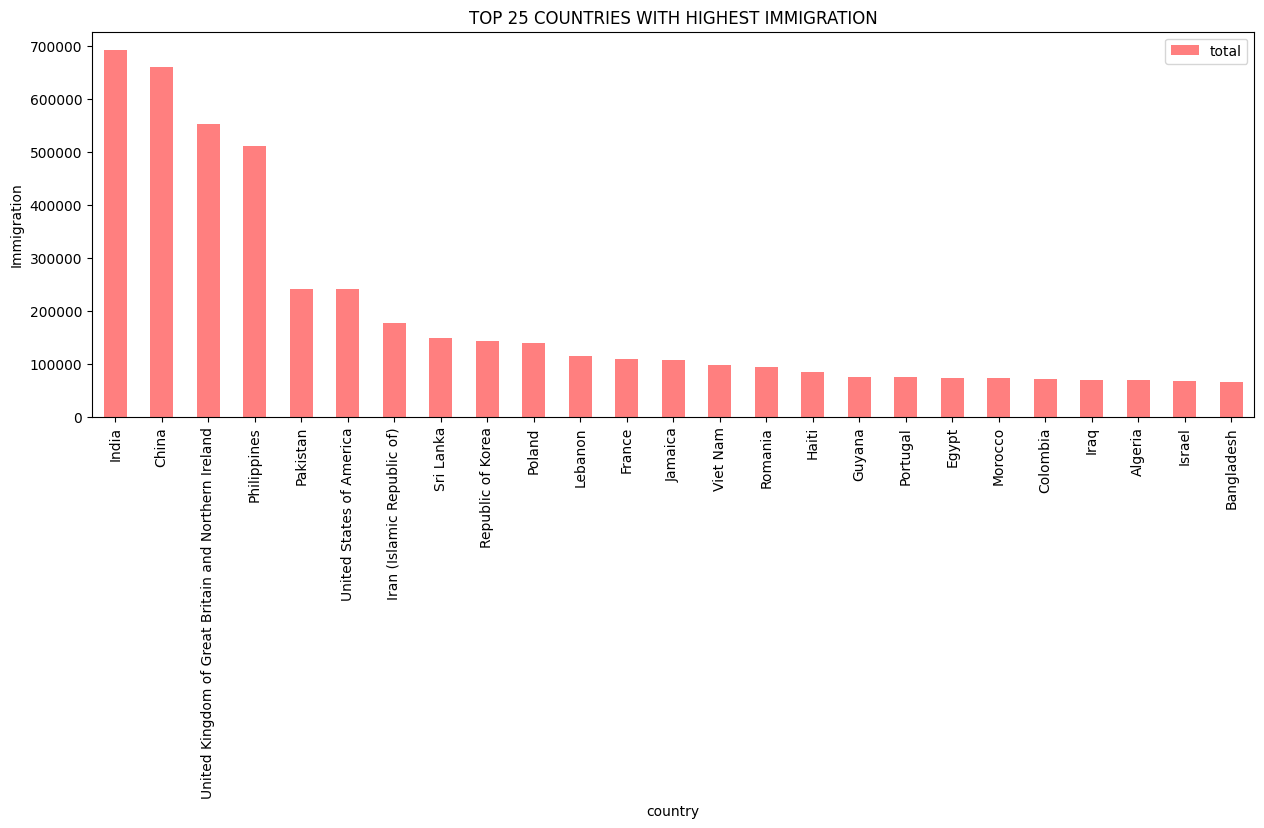

In [14]:
# top 25 countries with highest immigration
ax = df.sort_values('total', ascending = False).head(25).plot(
    kind= 'bar',
    y = 'total',
    title = 'TOP 25 COUNTRIES WITH HIGHEST IMMIGRATION',
    figsize= (15,5),
    color = 'red',
    alpha = .5)
ax.set_xlabel('country')
ax.set_ylabel('Immigration')